<a href="https://colab.research.google.com/github/Despair1525/VirtualMouse/blob/main/CNN_Module_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARE DATA

In [ ]:
!git clone https://github.com/Despair1525/VirtualMouse.git

Cloning into 'VirtualMouse'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 111 (delta 45), reused 90 (delta 30), pack-reused 0
Receiving objects: 100% (111/111), 118.84 MiB | 35.54 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
import zipfile
import os

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
#Creating module
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from time import perf_counter
import seaborn as sns
print(tf.__version__)

2.6.0


In [ ]:
local_zip = '/content/VirtualMouse/Data/BinaryData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
ImagesPath=[]
rootPath='/content/BinaryData'
count = 0
for ImagesFile in os.listdir('/content/BinaryData'):
  filePath=os.path.join(rootPath,ImagesFile)
  for Images in os.listdir(filePath):
    # if int(filePath.split('/')[-1]) ==3 :
    #   count +=1
    # if count == 2000:
    #   continue
    ImagesPath.append(os.path.join(filePath,Images))
print(len(ImagesPath))



1.   Index
2.   Two
3.   Three
4.   BackGround



In [ ]:
def plot_image(path,color=True,resize=(0,0)):
  try:
    img = cv2.imread(path,0) 
  except:
    print("Path is Images")
    img=path
  # img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  if color== False:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
  if resize != (0,0):
    img= cv2.resize(img,resize)
  print(img.shape) 
  plt.imshow(img) 
  plt.xlabel("Width")
  plt.ylabel("Height")


(40, 40, 3)


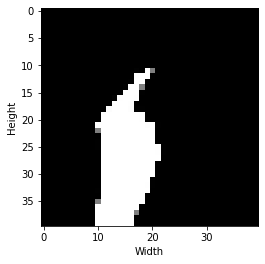

In [ ]:
plot_image('/content/BinaryData/1/5312.jpg',resize=(40,40))

In [ ]:
X=[] # transfer to images data
y=[] # lables
count =0
for image_path in ImagesPath:
  img=cv2.imread(image_path,0)
  # img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(40,40))
  X.append(img)
  Y= int(image_path.split("/")[-2])
  if Y==4 :
    Y=0
  y.append(Y)

In [ ]:
X=np.array(X,dtype="uint8")
X=X.reshape(len(y),40,40,1)
y=np.array(y)

In [ ]:
# split data
ts = 0.2 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)


In [ ]:
print(X_train.shape)

(11455, 40, 40, 1)


In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./200,
                                                            rotation_range=10,
                                                            zoom_range=0.10,
                                                            width_shift_range=0.1,
                                                            height_shift_range=0.1,
                                                            shear_range=0.1,
                                                            horizontal_flip=False,
                                                            fill_mode="nearest")

X_train_flow = generator.flow(X_train, y_train, batch_size=32)
X_val_flow = generator.flow(X_test ,y_test, batch_size=32)

# X_test_flow = generator.flow(X_test, y_test)

In [ ]:
print(len(X_test))
print(len(X_train))

2864
11455


#CREATE MODULE

In [ ]:

model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(40,40,1)),
                    MaxPool2D(2,2, padding='same'),
                    Conv2D(filters=64,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    
                    Flatten(),
                    
                    Dense(units=1024, activation="relu"),                 
                    Dense(units=256, activation="relu"),
                    Dense(units= 32,activation="relu"),
                    Dropout(0.5),
                    Dense(units=4, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 512)        

In [ ]:
# history=model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_test, y_test))

class_weight = {
    0: 1.0,
    1: 6,
    2: 1.0,
    3: 0.5,
    4: 1.0
}
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

history = model.fit(X_train_flow, 
                    validation_data=X_val_flow,class_weight=class_weight ,
                    epochs=100,
                    callbacks=[
                            tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True), 
                        
                            learning_rate_reduction
                    ])

Epoch 1/100
358/358 [==============================] - 61s 166ms/step - loss: 1.0060 - accuracy: 0.6488 - val_loss: 0.3278 - val_accuracy: 0.8994
Epoch 2/100
358/358 [==============================] - 59s 165ms/step - loss: 0.4136 - accuracy: 0.8722 - val_loss: 0.1411 - val_accuracy: 0.9647
Epoch 3/100
358/358 [==============================] - 61s 169ms/step - loss: 0.2512 - accuracy: 0.9232 - val_loss: 0.1271 - val_accuracy: 0.9647
Epoch 4/100
358/358 [==============================] - 59s 164ms/step - loss: 0.2089 - accuracy: 0.9382 - val_loss: 0.0623 - val_accuracy: 0.9864
Epoch 5/100
358/358 [==============================] - 59s 164ms/step - loss: 0.1779 - accuracy: 0.9496 - val_loss: 0.0825 - val_accuracy: 0.9801
Epoch 6/100
358/358 [==============================] - 59s 164ms/step - loss: 0.2165 - accuracy: 0.9448 - val_loss: 0.0726 - val_accuracy: 0.9829

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/100
358/358 [======================

In [ ]:
model.save('/content/drive/MyDrive/ModuleSave/HGR.h5')

#VISUAL RESULT

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and validation loss')

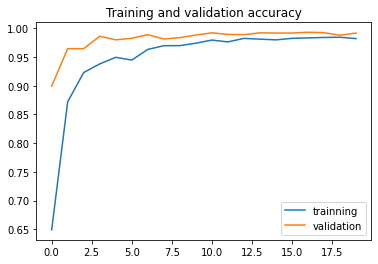

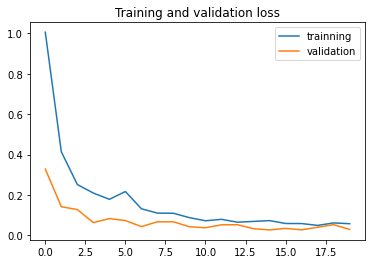

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.legend()
plt.title ('Training and validation accuracy')
plt.legend(["trainning","validation"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.legend(["trainning","validation"])
plt.title ('Training and validation loss'   )


Saving 2021-09-29 (2).png to 2021-09-29 (2).png
Path is Images
(40, 40, 3)
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 3.1409177e-32]]
2


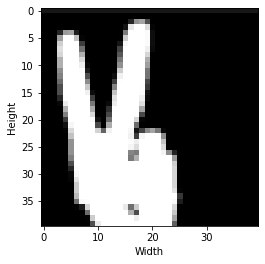

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

def plot_image2(img):
  img_cvt = img
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=cv2.imread(path,1)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # img = cv2.cvtColor(img, cv2.COLOR) 
  img=cv2.resize(img,(40,40),interpolation=cv2.INTER_AREA)
  # img = cv2.imread(img) # Reads the image into a numpy.array
  images=np.array(img)
  images=images.reshape(1,40,40,1)
  plot_image(img)
  classes = model.predict(images)
  predicted_label = np.argmax(classes)
  print(classes)
  print(predicted_label)
  
